In [15]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Iris.csv to Iris (2).csv
User uploaded file "Iris.csv" with length 5107 bytes


In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
iris = pd.read_csv('Iris.csv')
dataset=iris.copy()
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [91]:
 dataset.drop(iris.columns[[0,5 ]], axis = 1, inplace = True)


In [92]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [93]:
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [85]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
cleanDataSet = pd.DataFrame(standard.fit_transform(dataset))
cleanDataSet.head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [94]:
cleanDataSet.to_numpy()

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [21]:
!pip install minisom

In [95]:
from minisom import MiniSom
from matplotlib.gridspec import GridSpec
som = MiniSom(7,7,4,sigma=0.25,neighborhood_function='gaussian')
som.train_random(cleanDataSet.to_numpy(),30000)

In [96]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [98]:
target = iris.Species.astype('category').cat.codes
labels_map = som.labels_map(cleanDataSet.to_numpy(), target)
label_names = np.unique(target)

In [99]:
target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int8

In [100]:
labels_map

defaultdict(list,
            {(0, 0): Counter({1: 5}),
             (0, 2): Counter({2: 5}),
             (0, 4): Counter({0: 7}),
             (0, 5): Counter({2: 3}),
             (1, 0): Counter({0: 1}),
             (1, 3): Counter({2: 4}),
             (1, 4): Counter({1: 3}),
             (2, 0): Counter({2: 9}),
             (2, 2): Counter({1: 10, 2: 1}),
             (2, 5): Counter({1: 6}),
             (3, 1): Counter({0: 17}),
             (3, 4): Counter({0: 25}),
             (3, 5): Counter({1: 1, 2: 5}),
             (4, 5): Counter({2: 2}),
             (4, 6): Counter({2: 7}),
             (5, 0): Counter({1: 3, 2: 1}),
             (5, 1): Counter({1: 9}),
             (5, 2): Counter({1: 4}),
             (5, 3): Counter({2: 1}),
             (5, 4): Counter({2: 3}),
             (5, 5): Counter({1: 7}),
             (6, 0): Counter({1: 1, 2: 5}),
             (6, 2): Counter({2: 4}),
             (6, 5): Counter({1: 1})})

In [101]:
label_names

array([0, 1, 2], dtype=int8)

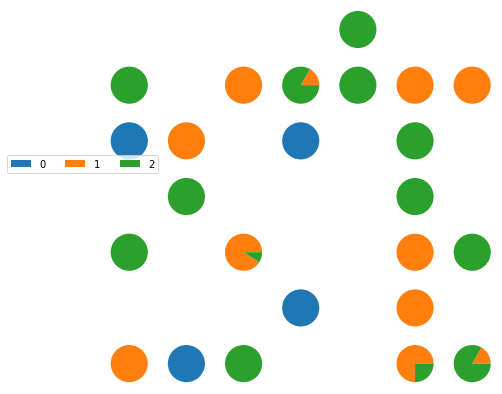

In [106]:
plt.figure(figsize=(7,7))
the_grid = GridSpec(7, 7)

for position in labels_map.keys():
  label_fracs = [labels_map[position][l] for l in label_names]
  plt.subplot(the_grid[6-position[1],position[0]], aspect=1)
  patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names,bbox_to_anchor = (0,1.5), ncol=3)

plt.show()

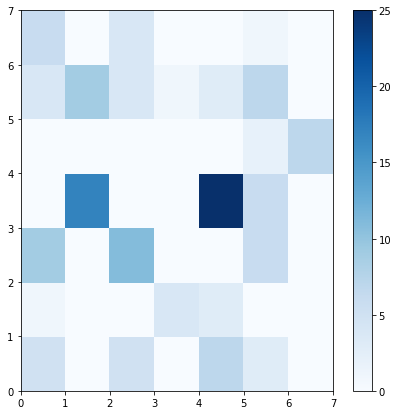

In [102]:
plt.figure(figsize=(7,7))
frequencies = np.zeros((7,7))
for position,values in som.win_map(cleanDataSet.to_numpy()).items():
  frequencies[position[0],position[1]] = len(values)
plt.pcolor(frequencies,cmap='Blues')
plt.colorbar()
plt.show()

